In [1]:
%matplotlib inline

from pathlib import Path

import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(12, 12)


import pandas as pd


import joypy

In [2]:
who_df = pd.read_csv(Path("../data/interim/calc_cols_added.csv"), index_col=0)

In [3]:
sub_dat = who_df[who_df['Vaccine Type'] == 'DTP3'].dropna(subset=['Coverage'])
sub_dat.Coverage = sub_dat.Coverage 

In [28]:
subset_countries = (sub_dat.groupby('Country Name')
                           .Admin2
                           .nunique())

ssc = subset_countries[(subset_countries >= 15)].index.values
ssc

array(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Bangladesh',
       'Benin', 'Bhutan', 'Bolivia', 'Bosnia & Herzegovina', 'Botswana',
       'Brazil', 'Burkina Faso', 'Burundi', 'CAR', 'Cabo Verde',
       'Cameroon', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Cuba', "Côte d'Ivoire", 'DPRKorea', 'DRCongo',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Laos', 'Liberia', 'Macedonia, TFYR', 'Madagascar',
       'Malawi', 'Maldives', 'Mali', 'Mauritania', 'Mexico', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Norway',
       'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru',
       'Republic of Moldova', 'Romania', 'Rwanda', 'Senegal',
       'Seychelles', 'Somalia', 'South Africa', 'South Sudan',
       'Sri Lanka', 'Sudan', 'Suriname', 'Tanzania', 'Togo',


In [58]:
summary_stats = (sub_dat[sub_dat['Country Name'].isin(ssc)]
                     .groupby('Country Name')
                     .Coverage
                     .agg(['mean', 'std'])
                     .round(2))


# means.name = 'means'
to_plot = sub_dat[sub_dat['Country Name'].isin(ssc)].merge(summary_stats,
                                                           right_index=True,
                                                           left_on='Country Name')

to_plot = to_plot[to_plot['std'] > 2.85]

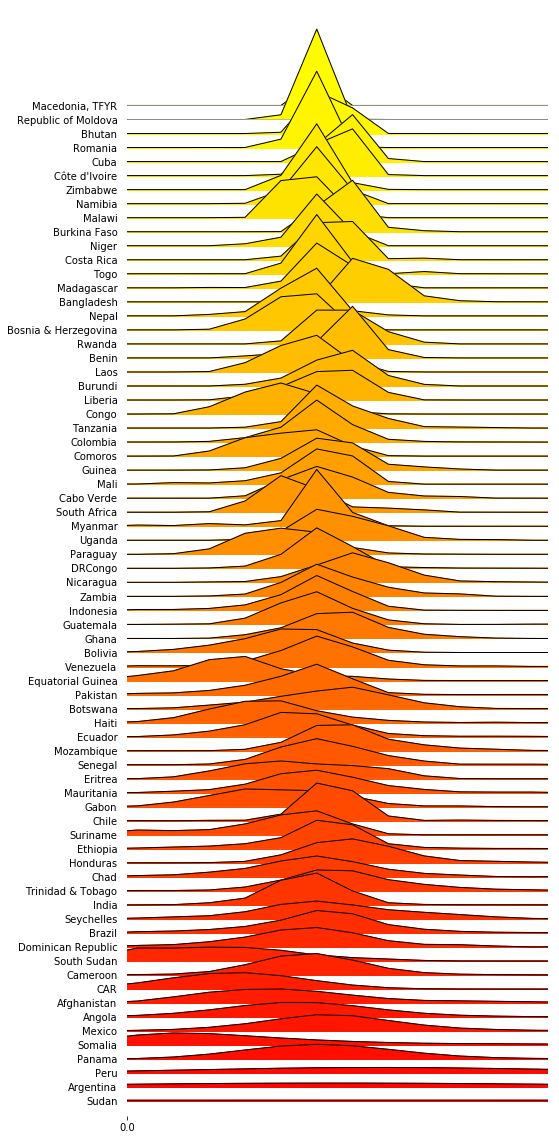

In [60]:
to_plot.sort_values('std', inplace=True)
labels = to_plot['Country Name'].unique().tolist()

_, axs = joypy.joyplot(to_plot,
                       colormap=plt.cm.autumn_r,
                       labels=labels,
                       column='Coverage',
                       range_style='all',
                       by='std',
                       bins=180,
#                        fade=True,
                       kind='kde',
#                        tails=0.2,
                       overlap=2,
                       grid="y", linewidth=1, legend=False, figsize=(8, 16),)

for a in axs:
    a.set_xlim(0, 200)

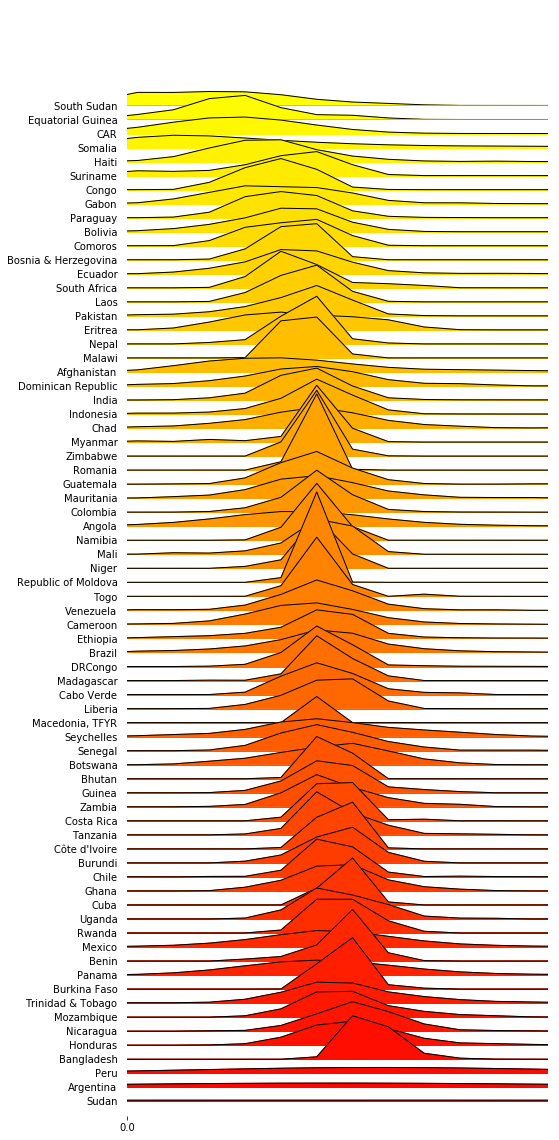

In [61]:
to_plot.sort_values('mean', inplace=True)
labels = to_plot['Country Name'].unique().tolist()

_, axs = joypy.joyplot(to_plot,
                       colormap=plt.cm.autumn_r,
                       labels=labels,
                       column='Coverage',
                       range_style='all',
                       by='mean',
                       bins=180,
#                        fade=True,
                       kind='kde',
#                        tails=0.2,
                       overlap=2,
                       grid="y", linewidth=1, legend=False, figsize=(8, 16),)

for a in axs:
    a.set_xlim(0, 200)